In [122]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [123]:
df = pd.read_csv('./Crime_Data_from_2020_to_Present.csv', parse_dates=["Date Rptd", "DATE OCC"])
df.head(5)

C:\Users\edwin\AppData\Local\Temp\ipykernel_12264\1033922391.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('./Crime_Data_from_2020_to_Present.csv', parse_dates=["Date Rptd", "DATE OCC"])
C:\Users\edwin\AppData\Local\Temp\ipykernel_12264\1033922391.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('./Crime_Data_from_2020_to_Present.csv', parse_dates=["Date Rptd", "DATE OCC"])


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [124]:
df = df.drop(labels=['DR_NO','AREA', 'Part 1-2', 'Crm Cd', 'LOCATION', 'Cross Street', 'Premis Cd', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Mocodes', 'Premis Desc', 'Status Desc'], axis=1)
encoder_sex = LabelEncoder()

df["Vict Sex"] = encoder_sex.fit_transform(df['Vict Sex'])
encoder_descent = LabelEncoder()
df["Vict Descent"] = encoder_descent.fit_transform(df['Vict Descent'])
encoder_area = LabelEncoder()
df['AREA NAME'] = encoder_area.fit_transform(df['AREA NAME'])
encoder_crm = LabelEncoder()
df['Crm Cd Desc'] = encoder_crm.fit_transform(df['Crm Cd Desc'])
encoder_status = LabelEncoder()

df = df[df['Vict Age'] >= 0]

q1 = df["LON"].quantile(0.01)
df = df[df["LON"] > q1]
q2 = df["LAT"].quantile(0.01)
df = df[df["LAT"] > q2]
df = df.dropna()

df = df.dropna()

In [125]:
df.head(), df.shape

(   Date Rptd   DATE OCC  TIME OCC  AREA NAME  Rpt Dist No  Crm Cd Desc  \
 0 2020-01-08 2020-01-08      2230         15          377            4   
 1 2020-01-02 2020-01-01       330          1          163            4   
 2 2020-04-14 2020-02-13      1200          1          155          100   
 3 2020-01-01 2020-01-01      1730          8         1543          130   
 4 2020-01-01 2020-01-01       415          7         1998          129   
 
    Vict Age  Vict Sex  Vict Descent      LAT       LON  
 0        36         1             2  34.0141 -118.2978  
 1        25         3             7  34.0459 -118.2545  
 2         0         4            18  34.0448 -118.2474  
 3        76         1            17  34.1685 -118.4019  
 4        31         4            18  34.2198 -118.4468  ,
 (801028, 11))

In [126]:
# fig, ax = plt.subplots(figsize=(5, 3))
# sns.regplot(x='Vict Age', y='Vict Descent', data=df, ax=ax)

In [127]:
# fig, ax = plt.subplots(figsize=(5, 3))
# sns.regplot(x='Vict Sex', y='Vict Age', data=df, ax=ax)

In [128]:
# fig, ax = plt.subplots(figsize=(5, 3))
# sns.regplot(x='Vict Age', y='Crm Cd Desc', data=df, ax=ax)

In [129]:
df_agrupado1 = df.groupby(['Vict Descent']).size().reset_index(name="Conteo")

df_agrupado1

,Vict Descent,Conteo
0,0,2
1,1,17519
2,2,114955
3,3,3081
4,4,60
5,5,3334
6,6,55
7,7,247241
8,8,754
9,9,1125


<Axes: xlabel='Vict Descent', ylabel='Conteo'>

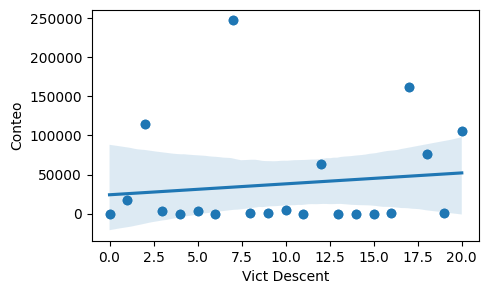

In [130]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(df_agrupado1['Vict Descent'], df_agrupado1['Conteo'])
sns.regplot(x='Vict Descent',y='Conteo', data=df_agrupado1, ax=ax)

In [131]:
df_agrupado2 = df.groupby(['Vict Age']).size().reset_index(name="Conteo")

df_agrupado2

,Vict Age,Conteo
0,0,198218
1,2,356
2,3,427
3,4,430
4,5,486
...,...,...
95,96,80
96,97,60
97,98,62
98,99,303


<Axes: xlabel='Vict Age', ylabel='Conteo'>

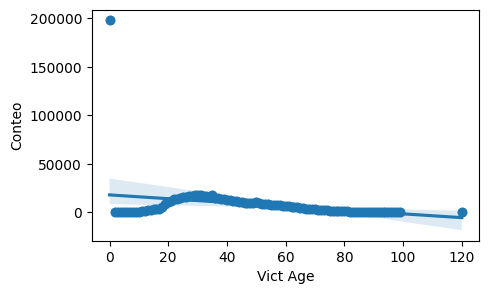

In [132]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(df_agrupado2['Vict Age'], df_agrupado2['Conteo'])
sns.regplot(x='Vict Age',y='Conteo', data=df_agrupado2, ax=ax)

In [133]:
df_agrupado3 = df.groupby(['Vict Sex']).size().reset_index(name="Conteo")

df_agrupado3

,Vict Sex,Conteo
0,0,1
1,1,295215
2,2,89
3,3,330022
4,4,70118
5,5,105583


<Axes: xlabel='Vict Sex', ylabel='Conteo'>

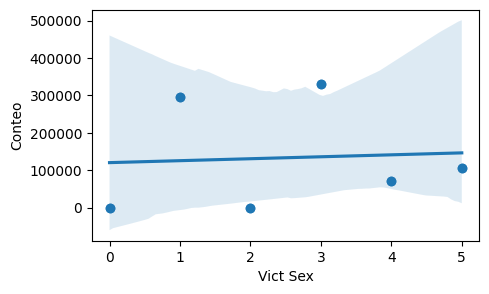

In [134]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(df_agrupado3['Vict Sex'], df_agrupado3['Conteo'])
sns.regplot(x='Vict Sex',y='Conteo', data=df_agrupado3, ax=ax)

In [135]:
df_agrupado4 = df.groupby(['LON']).size().reset_index(name="Conteo")
df_agrupado4

,LON,Conteo
0,-118.6106,43
1,-118.6105,26
2,-118.6104,248
3,-118.6103,478
4,-118.6102,213
...,...,...
4492,-118.1574,2
4493,-118.1569,1
4494,-118.1568,1
4495,-118.1560,21


<Axes: xlabel='LON', ylabel='Conteo'>

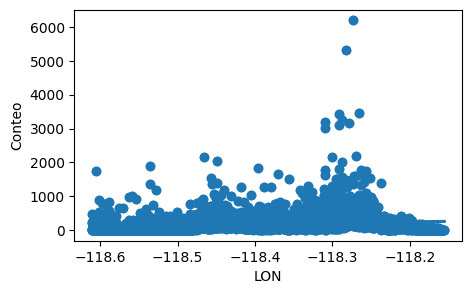

In [136]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(df_agrupado4['LON'], df_agrupado4['Conteo'])
sns.regplot(x='LON',y='Conteo', data=df_agrupado4, ax=ax)

In [137]:
df_agrupado5 = df.groupby(['LAT']).size().reset_index(name="Conteo")
df_agrupado5

,LAT,Conteo
0,33.7061,2
1,33.7064,13
2,33.7065,4
3,33.7068,3
4,33.7070,70
...,...,...
5386,34.3292,2
5387,34.3293,1
5388,34.3297,2
5389,34.3330,1


<Axes: xlabel='LAT', ylabel='Conteo'>

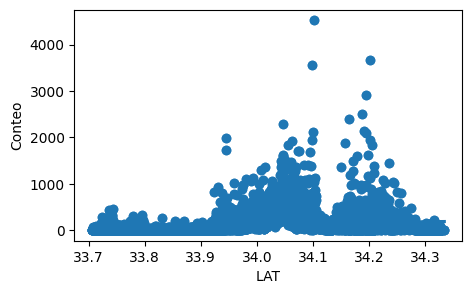

In [138]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(df_agrupado5['LAT'], df_agrupado5['Conteo'])
sns.regplot(x='LAT',y='Conteo', data=df_agrupado5, ax=ax)

In [139]:
df_agrupado6 = df.groupby(['TIME OCC']).size().reset_index(name="Conteo")
df_agrupado6

,TIME OCC,Conteo
0,1,14035
1,2,163
2,3,165
3,4,136
4,5,2725
...,...,...
1434,2355,993
1435,2356,44
1436,2357,54
1437,2358,61


<Axes: xlabel='TIME OCC', ylabel='Conteo'>

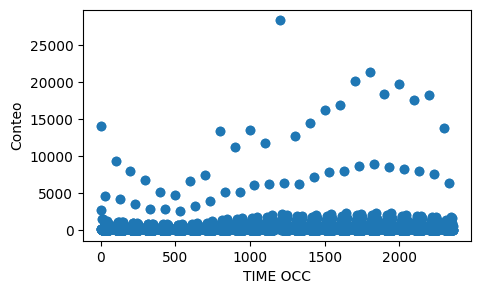

In [140]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(df_agrupado6['TIME OCC'], df_agrupado6['Conteo'])
sns.regplot(x='TIME OCC',y='Conteo', data=df_agrupado6, ax=ax)

In [141]:
df_agrupado7 = df.groupby(['Crm Cd Desc']).size().reset_index(name="Conteo")
df_agrupado7

,Crm Cd Desc,Conteo
0,0,2130
1,1,988
2,2,46379
3,3,4202
4,4,63639
...,...,...
133,133,1611
134,134,5493
135,135,10001
136,136,761


<Axes: xlabel='Crm Cd Desc', ylabel='Conteo'>

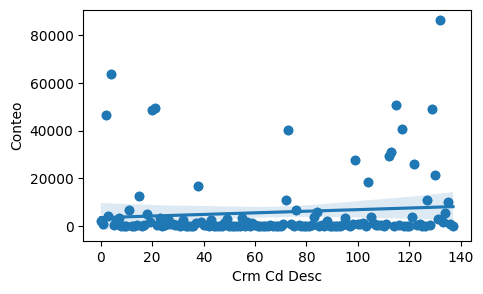

In [142]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(df_agrupado7['Crm Cd Desc'], df_agrupado7['Conteo'])
sns.regplot(x='Crm Cd Desc', y='Conteo', data=df_agrupado7, ax=ax)

In [143]:
df_agrupado9 = df.groupby(['LON', 'LAT']).size().reset_index(name='conteo_sucesos')

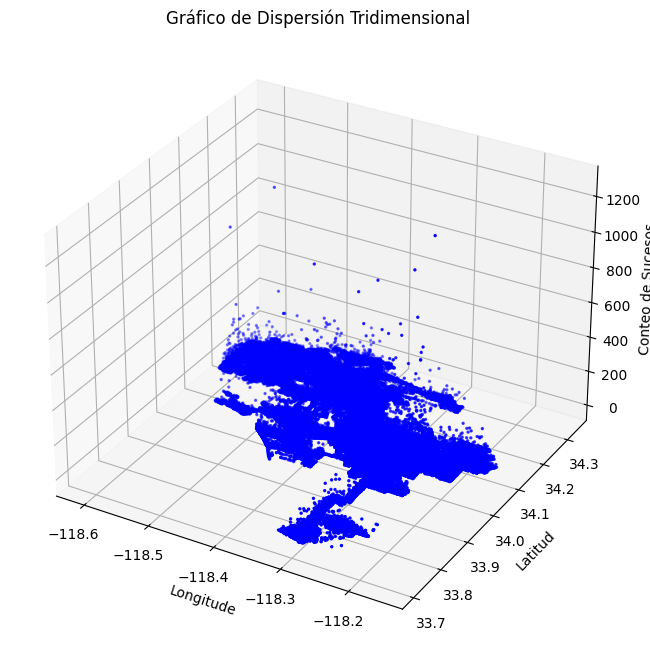

In [144]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar el gráfico de dispersión tridimensional
ax.scatter(df_agrupado9['LON'], df_agrupado9['LAT'], df_agrupado9['conteo_sucesos'], c='blue', s=2)

# Etiquetas de los ejes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitud')
ax.set_zlabel('Conteo de Sucesos')

# Título del gráfico
ax.set_title('Gráfico de Dispersión Tridimensional')

# Mostrar el gráfico
plt.show()

In [145]:
df_agrupado10 = df.groupby(['Vict Age', 'Vict Sex']).size().reset_index(name='conteo_sucesos')

df_agrupado10.tail(5)

,Vict Age,Vict Sex,conteo_sucesos
348,98,4,4
349,99,1,141
350,99,3,150
351,99,4,12
352,120,5,1


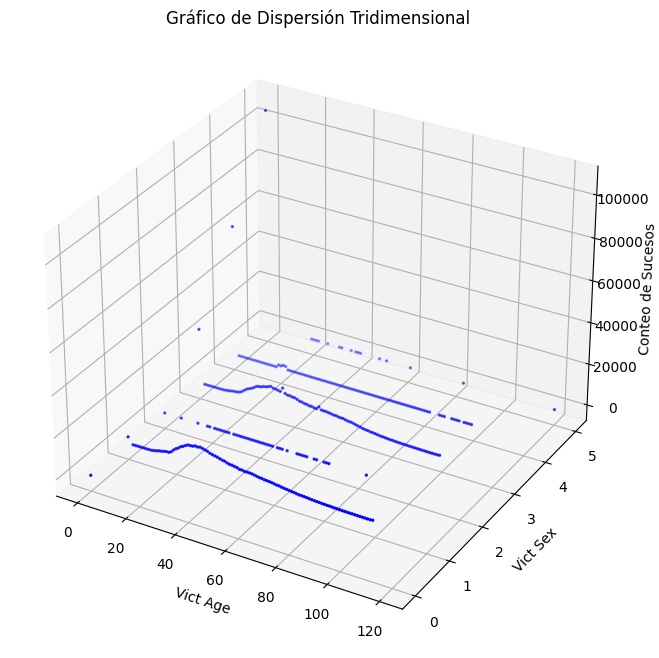

In [146]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar el gráfico de dispersión tridimensional
ax.scatter(df_agrupado10['Vict Age'], df_agrupado10['Vict Sex'], df_agrupado10['conteo_sucesos'], c='blue', s=2)

# Etiquetas de los ejes
ax.set_xlabel('Vict Age')
ax.set_ylabel('Vict Sex')
ax.set_zlabel('Conteo de Sucesos')

# Título del gráfico
ax.set_title('Gráfico de Dispersión Tridimensional')

# Mostrar el gráfico
plt.show()

In [147]:
data = pd.read_excel("./hurto_a_personas_20.xlsx", parse_dates=['FECHA HECHO '], date_format='%d/%m/%Y')
data_copy = data.copy()

In [148]:
data_copy = data_copy.drop('FECHA HECHO ')

KeyError: "['FECHA HECHO '] not found in axis"

In [149]:
arma_encoder = LabelEncoder()
data_copy['ARMA MEDIO '] = arma_encoder.fit_transform(data_copy['ARMA MEDIO '])
dpto_encoder = LabelEncoder()
data_copy['DEPARTAMENTO '] = dpto_encoder.fit_transform(data_copy['DEPARTAMENTO '])
mcpio_encoder = LabelEncoder()
data_copy['MUNICIPIO '] = mcpio_encoder.fit_transform(data_copy['MUNICIPIO '])
genero_encoder = LabelEncoder()
data_copy['GENERO '] = genero_encoder.fit_transform(data_copy['GENERO '])
edad_encoder = LabelEncoder()
data_copy['AGRUPA_EDAD_PERSONA'] = edad_encoder.fit_transform(data_copy['AGRUPA_EDAD_PERSONA'])

In [150]:
X = data_copy[['ARMA MEDIO ', 'DEPARTAMENTO ', 'MUNICIPIO ', 'GENERO ', 'AGRUPA_EDAD_PERSONA']]
y = data_copy['CANTIDAD ']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X_test)

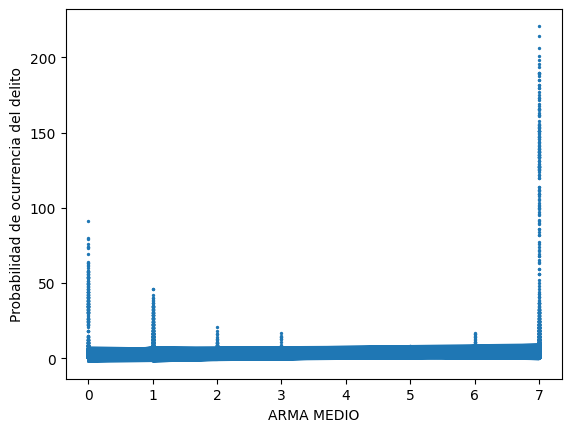

In [157]:
plt.scatter(X_test['ARMA MEDIO '], y_test, s=2)
plt.plot(X_test['ARMA MEDIO '], y_pred)
plt.xlabel("ARMA MEDIO")
plt.ylabel("Probabilidad de ocurrencia del delito")
plt.show()

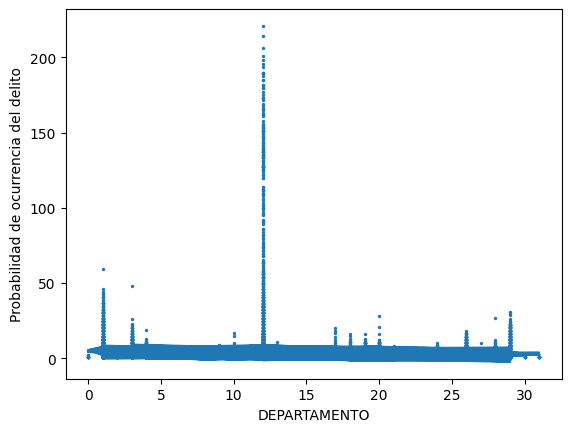

In [166]:
plt.scatter(X_test['DEPARTAMENTO '], y_test, s=2)
plt.plot(X_test['DEPARTAMENTO '], y_pred)
plt.xlabel("DEPARTAMENTO")
plt.ylabel("Probabilidad de ocurrencia del delito")
plt.show()

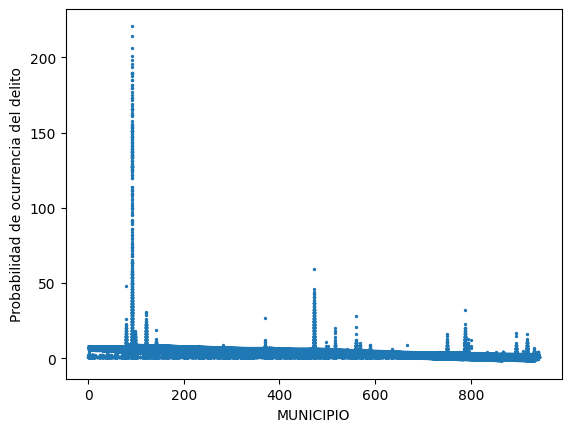

In [167]:
plt.scatter(X_test['MUNICIPIO '], y_test, s=2)
plt.plot(X_test['MUNICIPIO '], y_pred)
plt.xlabel("MUNICIPIO")
plt.ylabel("Probabilidad de ocurrencia del delito")
plt.show()

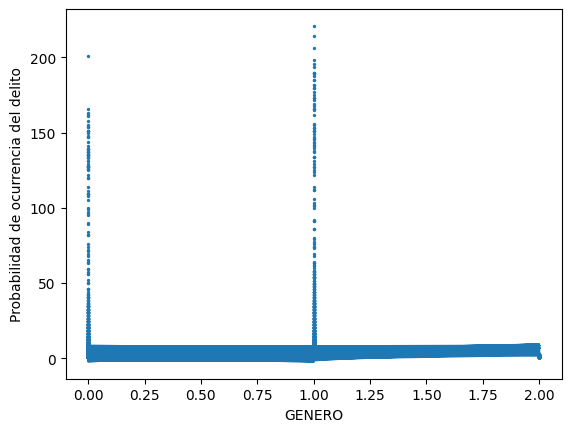

In [168]:
plt.scatter(X_test['GENERO '], y_test, s=2)
plt.plot(X_test['GENERO '], y_pred)
plt.xlabel("GENERO")
plt.ylabel("Probabilidad de ocurrencia del delito")
plt.show()

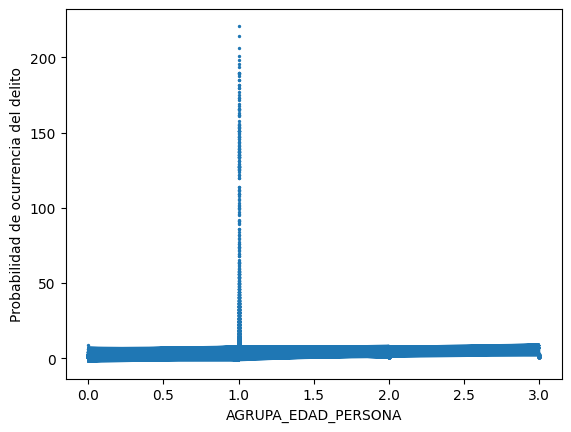

In [174]:
plt.scatter(X_test['AGRUPA_EDAD_PERSONA'], y_test, s=2)
plt.plot(X_test['AGRUPA_EDAD_PERSONA'], y_pred)
plt.xlabel("AGRUPA_EDAD_PERSONA")
plt.ylabel("Probabilidad de ocurrencia del delito")
plt.show()

In [158]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)

LinearRegression()

In [159]:
log_reg = LogisticRegression()
log_reg.fit(X, y)


c:\Users\edwin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [160]:
X_norm = normalize(X)
log_reg_norm = LogisticRegression()
log_reg_norm.fit(X_norm, y)

c:\Users\edwin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [161]:
print("Regresión lineal:")
print(lin_reg.coef_)
print(lin_reg.intercept_)
print("Regresión polinómica:")
print(lin_reg_poly.coef_)
print(lin_reg_poly.intercept_)
print("Regresión logística:")
print(log_reg.coef_)
print(log_reg.intercept_)
print("Regresión logística_normalizada:")
print(log_reg_norm.coef_)
print(log_reg_norm.intercept_)

Regresión lineal:
[ 0.2638162  -0.06311598 -0.00661316 -0.01493474  0.80033289]
5.510649154309466
Regresión polinómica:
[ 0.00000000e+00 -1.24793256e+00  4.37492469e-01 -2.06117919e-02
 -4.47539568e+00  8.88671265e+00  2.42966114e-01 -4.06903432e-03
 -7.10973047e-04 -1.23757203e-01  1.41039673e-01 -1.60431192e-02
  5.48064019e-05 -2.30151714e-02 -1.92875042e-02  1.87903396e-05
 -9.07197668e-05 -2.74425836e-03  5.58035383e+00  2.69149946e-02
 -4.34114728e+00]
2.2327362382803524
Regresión logística:
[[ 6.13032960e-02  1.16163696e-01  4.51229726e-02  1.64836062e-02
   2.26808280e-02]
 [ 1.43276990e-02  9.54307234e-02  4.34962911e-02  1.27588987e-03
   3.09891629e-03]
 [ 3.42563584e-03  4.32840471e-02  4.30977850e-02 -4.78178156e-04
  -4.93281916e-05]
 ...
 [-3.28659180e-04 -1.20090154e-03 -8.26500773e-03 -5.45143918e-05
  -9.09678497e-05]
 [-3.28659180e-04 -1.20090154e-03 -8.26500773e-03 -5.45143918e-05
  -9.09678497e-05]
 [-3.28659180e-04 -1.20090154e-03 -8.26500773e-03 -5.45143918e-05
 

c:\Users\edwin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


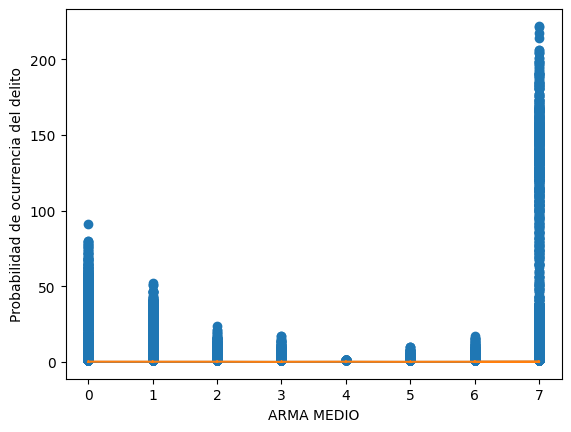

In [162]:
plt.scatter(X['ARMA MEDIO '], y)
plt.plot(X['ARMA MEDIO '], log_reg_norm.predict_proba(X)[:, 1])
plt.plot(X['ARMA MEDIO '], log_reg.predict_proba(X)[:, 1])
plt.xlabel("ARMA MEDIO")
plt.ylabel("Probabilidad de ocurrencia del delito")
plt.show()

c:\Users\edwin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


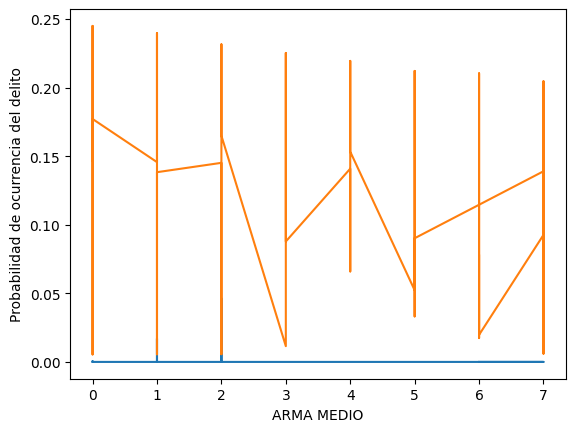

In [184]:
plt.plot(X['ARMA MEDIO '], log_reg_norm.predict_proba(X)[:, 1])
plt.plot(X['ARMA MEDIO '], log_reg.predict_proba(X)[:, 1])
plt.xlabel("ARMA MEDIO")
plt.ylabel("Probabilidad de ocurrencia del delito")
plt.show()

c:\Users\edwin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


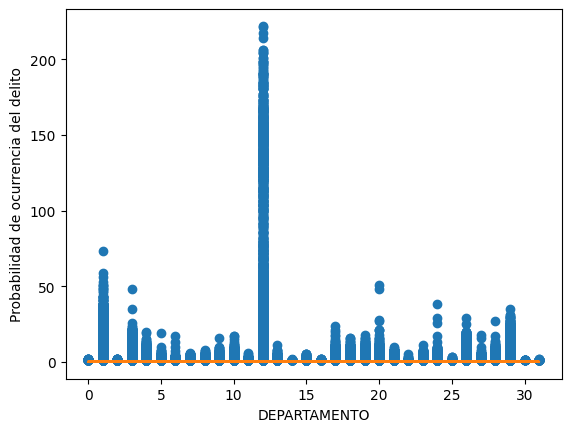

In [169]:
plt.scatter(X['DEPARTAMENTO '], y)
plt.plot(X['DEPARTAMENTO '], log_reg_norm.predict_proba(X)[:, 1])
plt.plot(X['DEPARTAMENTO '], log_reg.predict_proba(X)[:, 1])
plt.xlabel("DEPARTAMENTO")
plt.ylabel("Probabilidad de ocurrencia del delito")
plt.show()

c:\Users\edwin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


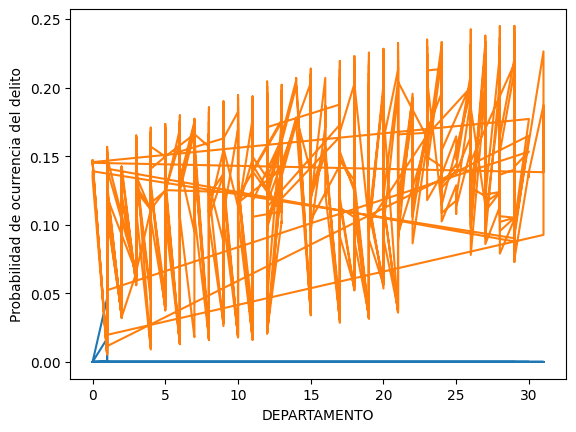

In [178]:
plt.plot(X['DEPARTAMENTO '], log_reg_norm.predict_proba(X)[:, 1])
plt.plot(X['DEPARTAMENTO '], log_reg.predict_proba(X)[:, 1])
plt.xlabel("DEPARTAMENTO")
plt.ylabel("Probabilidad de ocurrencia del delito")
plt.show()

c:\Users\edwin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


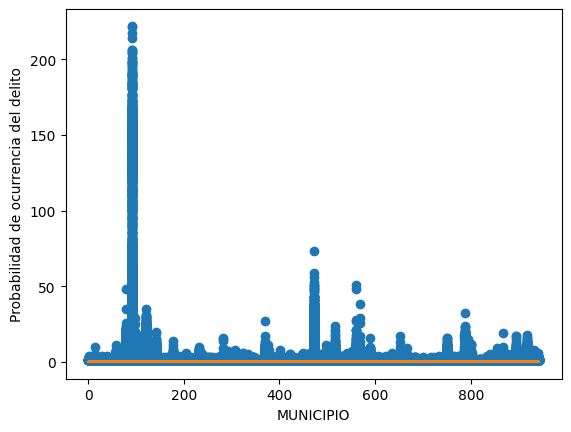

In [170]:
plt.scatter(X['MUNICIPIO '], y)
plt.plot(X['MUNICIPIO '], log_reg_norm.predict_proba(X)[:, 1])
plt.plot(X['MUNICIPIO '], log_reg.predict_proba(X)[:, 1])
plt.xlabel("MUNICIPIO")
plt.ylabel("Probabilidad de ocurrencia del delito")
plt.show()

c:\Users\edwin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


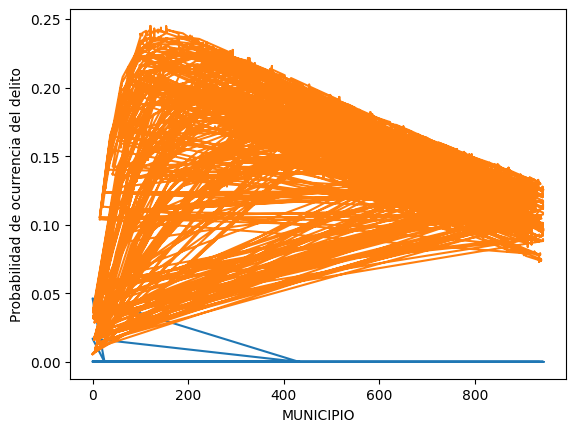

In [179]:
plt.plot(X['MUNICIPIO '], log_reg_norm.predict_proba(X)[:, 1])
plt.plot(X['MUNICIPIO '], log_reg.predict_proba(X)[:, 1])
plt.xlabel("MUNICIPIO")
plt.ylabel("Probabilidad de ocurrencia del delito")
plt.show()

c:\Users\edwin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


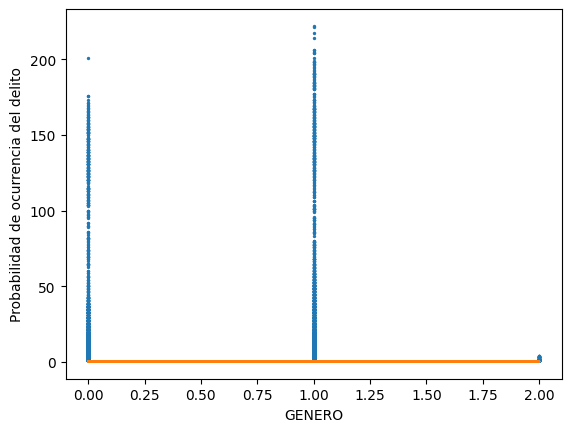

In [172]:
plt.scatter(X['GENERO '], y, s=2)
plt.plot(X['GENERO '], log_reg_norm.predict_proba(X)[:, 1])
plt.plot(X['GENERO '], log_reg.predict_proba(X)[:, 1])
plt.xlabel("GENERO")
plt.ylabel("Probabilidad de ocurrencia del delito")
plt.show()

c:\Users\edwin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


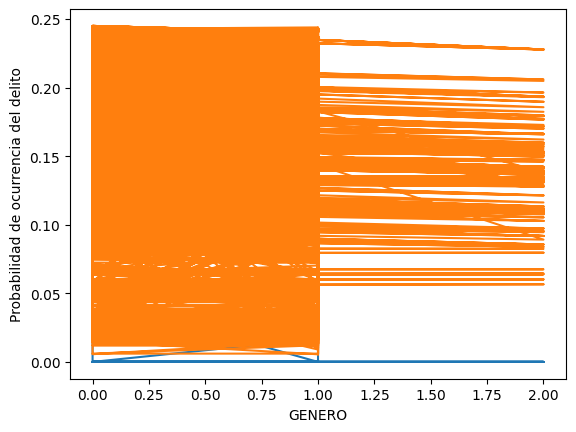

In [180]:
plt.plot(X['GENERO '], log_reg_norm.predict_proba(X)[:, 1])
plt.plot(X['GENERO '], log_reg.predict_proba(X)[:, 1])
plt.xlabel("GENERO")
plt.ylabel("Probabilidad de ocurrencia del delito")
plt.show()

c:\Users\edwin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


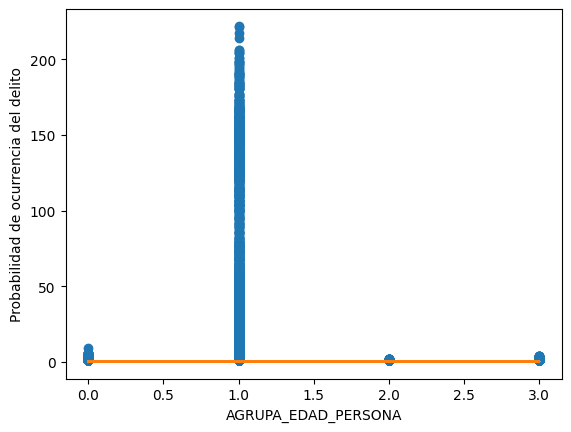

In [173]:
plt.scatter(X['AGRUPA_EDAD_PERSONA'], y)
plt.plot(X['AGRUPA_EDAD_PERSONA'], log_reg_norm.predict_proba(X)[:, 1])
plt.plot(X['AGRUPA_EDAD_PERSONA'], log_reg.predict_proba(X)[:, 1])
plt.xlabel("AGRUPA_EDAD_PERSONA")
plt.ylabel("Probabilidad de ocurrencia del delito")
plt.show()

c:\Users\edwin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


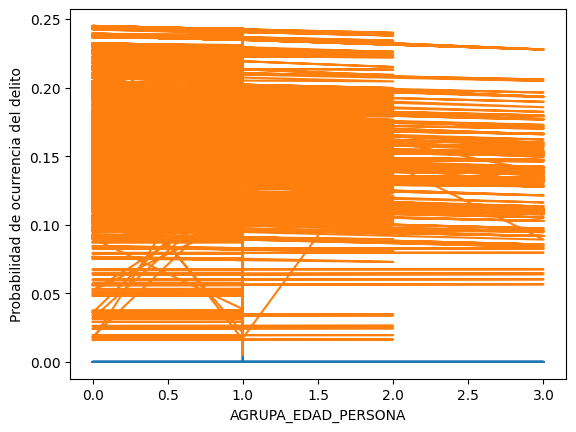

In [181]:
plt.plot(X['AGRUPA_EDAD_PERSONA'], log_reg_norm.predict_proba(X)[:, 1])
plt.plot(X['AGRUPA_EDAD_PERSONA'], log_reg.predict_proba(X)[:, 1])
plt.xlabel("AGRUPA_EDAD_PERSONA")
plt.ylabel("Probabilidad de ocurrencia del delito")
plt.show()